# Simple Linear Regression

## Import necessary modules

In [129]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import pandas as pd
import statsmodels.api as sm

## Outlier removal function

Detect and deletes outliers in the scores using the Inter Quartile Range

In [130]:
def delete_outliers (var):
    
    Q1 = np.percentile(scores_GDP[var], 25, interpolation = 'midpoint')
    Q3 = np.percentile(scores_GDP[var], 75, interpolation = 'midpoint')
    IQR = Q3-Q1 
    
    #Above Upper Bound
    upper = scores_GDP.index[scores_GDP[var] >= (Q3 + 1.5*IQR)]
    
    #Below Lower Bound
    lower = scores_GDP.index[scores_GDP[var] <= (Q1 - 1.5*IQR)]
    
    #Drops outliers
    scores_GDP.drop(upper, inplace = True)
    scores_GDP.drop(lower, inplace = True)

## Data scraping and cleaning

Reads data and assigns it to a pandas' dataframe

In [131]:
df = pd.read_excel('/home/gabriel/Documents/index2021_data.xls','Sheet1', index_col=None, na_values=['N/A'])

In [132]:
#Takes the scores and GDP per capita variables and creates a sub dataframe

scores_GDP = df[['Country Name','2021 Score','GDP per Capita (PPP)']].copy(deep=True)

if scores_GDP.isnull().any().any() == True:  #Checks is there are any null values in the dataframe
    scores_GDP_with_nan = scores_GDP.index[scores_GDP.isnull().any(axis=1)] #Creates dataframe with countries with null values
    scores_GDP.drop(scores_GDP_with_nan, axis = 0, inplace = True) #Deletes countries without rows

Create a scatterplot to see if there is a relationship in the data

Text(0, 0.5, 'GDP per Capita (PPP)')

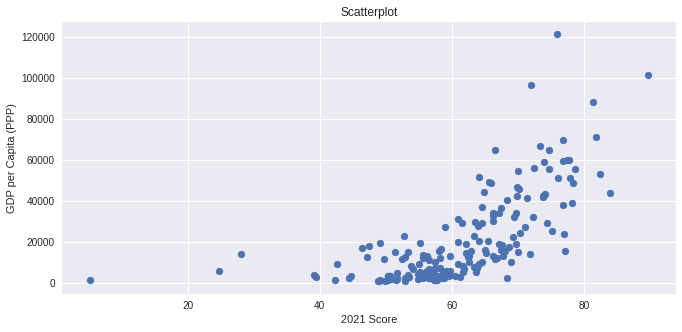

In [133]:
scat, axis = plt.subplots()
axis.scatter(scores_GDP['2021 Score'], scores_GDP['GDP per Capita (PPP)'])
axis.set_title('Scatterplot')
axis.set_xlabel('2021 Score')
axis.set_ylabel('GDP per Capita (PPP)')

We can see a relationship in the data, as well as a few clear outliers that will be deleted

In [134]:
#Delete outliers in GDP and score

delete_outliers('2021 Score')
delete_outliers('GDP per Capita (PPP)')

## Define the regression model

Create another scatterplot without the outliers

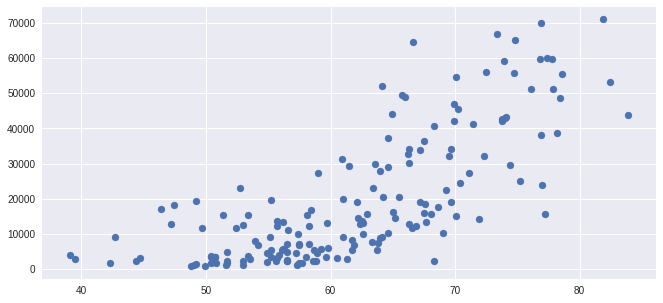

In [135]:
scat, axis = plt.subplots()
axis.scatter(scores_GDP['2021 Score'], scores_GDP['GDP per Capita (PPP)'])


Define the variables for the model

In [136]:
x = scores_GDP[['2021 Score']] #Independent Variable, explains the y

y = scores_GDP['GDP per Capita (PPP)'] #Dependent Variable, we want to explain it

model = sm.OLS(y, x).fit()

## Show results

Plot the actual and predicted values 

Text(0, 0.5, 'GDP per Capita (PPP)')

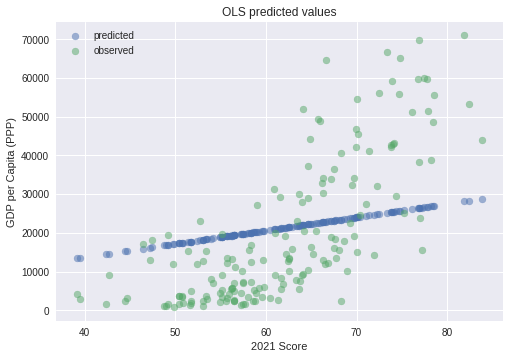

In [137]:
plt.style.use('seaborn')

predictions = model.predict(x) # make the predictions by the model

fix, ax = plt.subplots()

#Plot the predicted values

ax.scatter(scores_GDP['2021 Score'], predictions, alpha=0.5,  
        label = 'predicted')

#Plot the observed values

ax.scatter(scores_GDP['2021 Score'], scores_GDP['GDP per Capita (PPP)'], alpha=0.5,
        label='observed') 

#Customize graph

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('2021 Score')
ax.set_ylabel('GDP per Capita (PPP)')

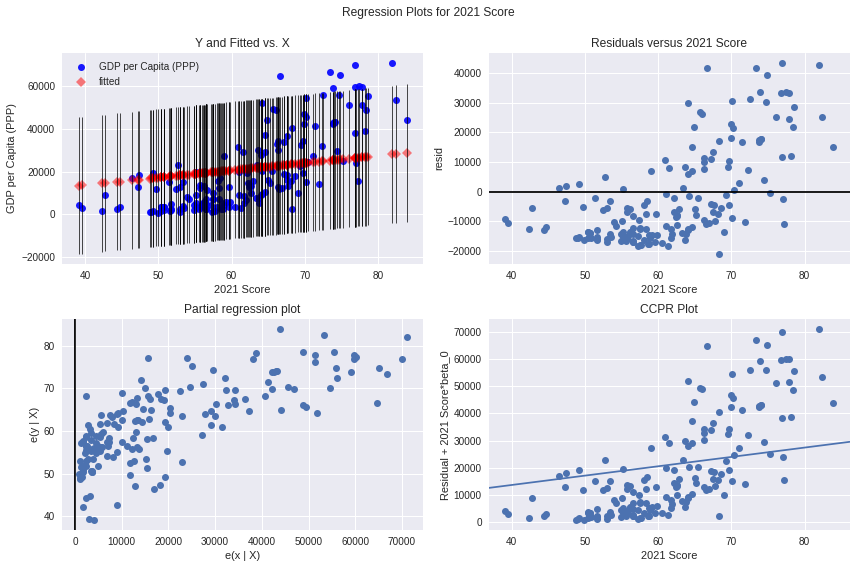

In [138]:
#Define figure size
fig = plt.figure(figsize=(12,8))

#Produce regression plots
fig = sm.graphics.plot_regress_exog(model,'2021 Score' , fig=fig)

Print out the statistics

In [139]:
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     GDP per Capita (PPP)   R-squared (uncentered):                   0.638
Model:                              OLS   Adj. R-squared (uncentered):              0.636
Method:                   Least Squares   F-statistic:                              299.7
Date:                  Thu, 03 Feb 2022   Prob (F-statistic):                    2.31e-39
Time:                          11:41:28   Log-Likelihood:                         -1899.8
No. Observations:                   171   AIC:                                      3802.
Df Residuals:                       170   BIC:                                      3805.
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------